In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import numpy as np
import pandas as pd
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,7]


df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [107]:
df['LanguageWorkedWith'].describe()

count                           87569
unique                          20098
top       HTML/CSS;JavaScript;PHP;SQL
freq                             1483
Name: LanguageWorkedWith, dtype: object

In [108]:
df['LanguageWorkedWith'].head()

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

Split multiple given answers:

In [0]:
def countLanguages(answer):
    for language in answer.split(';'):
        languagesCount[language] +=1

In [110]:
from collections import defaultdict
languagesCount = defaultdict(int)


languageAnswers = df['LanguageWorkedWith'].dropna()

languageAnswers.apply(countLanguages)

0        None
1        None
2        None
3        None
4        None
         ... 
88875    None
88876    None
88877    None
88878    None
88882    None
Name: LanguageWorkedWith, Length: 87569, dtype: object

In [111]:
languagesCount

defaultdict(int,
            {'Assembly': 5833,
             'Bash/Shell/PowerShell': 31991,
             'C': 18017,
             'C#': 27097,
             'C++': 20524,
             'Clojure': 1254,
             'Dart': 1683,
             'Elixir': 1260,
             'Erlang': 777,
             'F#': 973,
             'Go': 7201,
             'HTML/CSS': 55466,
             'Java': 35917,
             'JavaScript': 59219,
             'Kotlin': 5620,
             'Objective-C': 4191,
             'Other(s):': 7920,
             'PHP': 23030,
             'Python': 36443,
             'R': 5048,
             'Ruby': 7331,
             'Rust': 2794,
             'SQL': 47544,
             'Scala': 3309,
             'Swift': 5744,
             'TypeScript': 18523,
             'VBA': 4781,
             'WebAssembly': 1015})

In [0]:
uniqueLanguages =pd.Series(languagesCount)

Remove 'Other(s)' because of missing information about theses languages and small relative frequency 1.8%

In [113]:
print(uniqueLanguages['Other(s):']/uniqueLanguages.sum())

uniqueLanguages=uniqueLanguages.drop(labels=['Other(s):'])

0.01797936459291041


In [0]:
uniqueLanguages=uniqueLanguages.sort_values(ascending=False)

In [115]:
uniqueLanguages.sum()

432585

In [0]:
uniqueLanguagesRelFreq = uniqueLanguages/uniqueLanguages.sum()

Accumulate relative frequencies and drop by 95%

In [0]:
uniqueLanguages =uniqueLanguages[uniqueLanguagesRelFreq.cumsum()<0.95]
uniqueLanguagesRelFreq = uniqueLanguagesRelFreq[uniqueLanguagesRelFreq.cumsum()<0.95]


In [118]:
uniqueLanguagesRelFreq.count()

17

In [119]:
print(uniqueLanguagesRelFreq)

JavaScript               0.136896
HTML/CSS                 0.128220
SQL                      0.109907
Python                   0.084245
Java                     0.083029
Bash/Shell/PowerShell    0.073953
C#                       0.062640
PHP                      0.053238
C++                      0.047445
TypeScript               0.042819
C                        0.041650
Ruby                     0.016947
Go                       0.016646
Assembly                 0.013484
Swift                    0.013278
Kotlin                   0.012992
R                        0.011669
dtype: float64


In [120]:
print(uniqueLanguages)

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
C                        18017
Ruby                      7331
Go                        7201
Assembly                  5833
Swift                     5744
Kotlin                    5620
R                         5048
dtype: int64


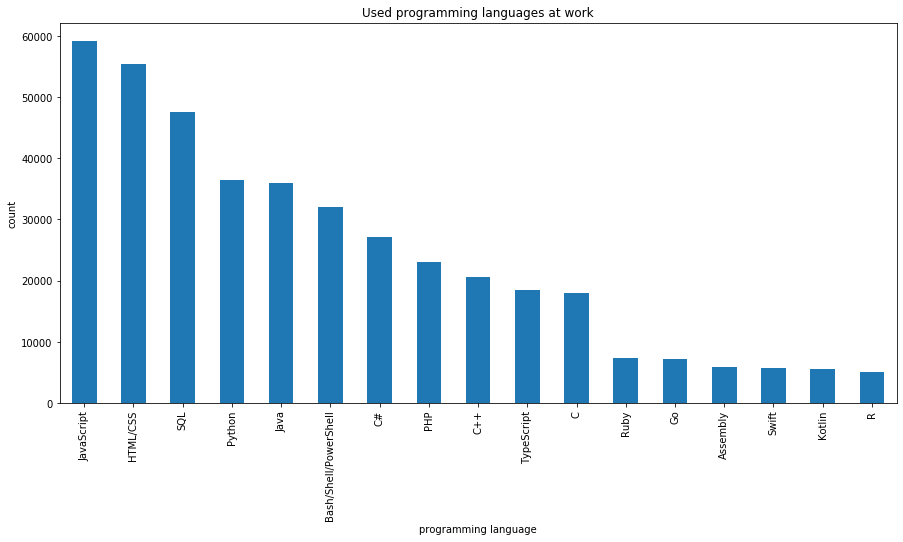

In [121]:
uniqueLanguages.plot(kind='bar')
plt.title('Used programming languages at work');
plt.xlabel('programming language');
plt.ylabel('count');

In [122]:
staticallyTypedLanguages=['SQL','Java','C#','C++','TypeScript','C','Go','Swift','Kotlin']
len(staticallyTypedLanguages)

dynamicallyTypedLanguages = list(uniqueLanguages.drop(labels=staticallyTypedLanguages).index)
print(dynamicallyTypedLanguages)

['JavaScript', 'HTML/CSS', 'Python', 'Bash/Shell/PowerShell', 'PHP', 'Ruby', 'Assembly', 'R']


In [123]:
uniqueLanguagesRelFreq[staticallyTypedLanguages].sum()

0.43040558502953175

In [124]:
uniqueLanguagesRelFreq[dynamicallyTypedLanguages].sum()

0.5186518256527619

In [0]:
def filterByLanguages(answerList,languageList):
    answerSet = set(answerList)
    languageSet = set(languageList)
    union = answerSet.union(languageSet)
    intersection = union.difference(languageSet)
#     print(answerSet)
#     print(languageSet)
#     print(union)
#     print(intersection)
    return not bool(intersection)

In [0]:
df = df[df['LanguageWorkedWith'].notna()]
df_used_static = df[df['LanguageWorkedWith'].apply(lambda x:filterByLanguages(x.split(';'),staticallyTypedLanguages))]
df_used_dynamic = df[df['LanguageWorkedWith'].apply(lambda x: filterByLanguages(x.split(';'),dynamicallyTypedLanguages))]

In [127]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,87569.000000,5.573400e+04,5.561700e+04,64221.000000,49601.000000,78523.000000
mean,44426.316025,5.383891e+11,1.271993e+05,42.127524,5.076542,30.339593
std,25661.687650,7.336565e+13,2.842660e+05,37.323927,5.472601,9.137697
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22197.000000,2.000000e+04,2.588700e+04,40.000000,2.000000,24.000000
50%,44418.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66639.000000,1.200000e+05,1.000000e+05,44.000000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [128]:
yearsStatic = df_used_static['YearsCodePro'].value_counts().rename(index={'Less than 1 year': '0','More than 50 years':'51'})
yearsStatic.index = pd.to_numeric(yearsStatic.index,errors='coerce')
yearsStatic.sum()


4341

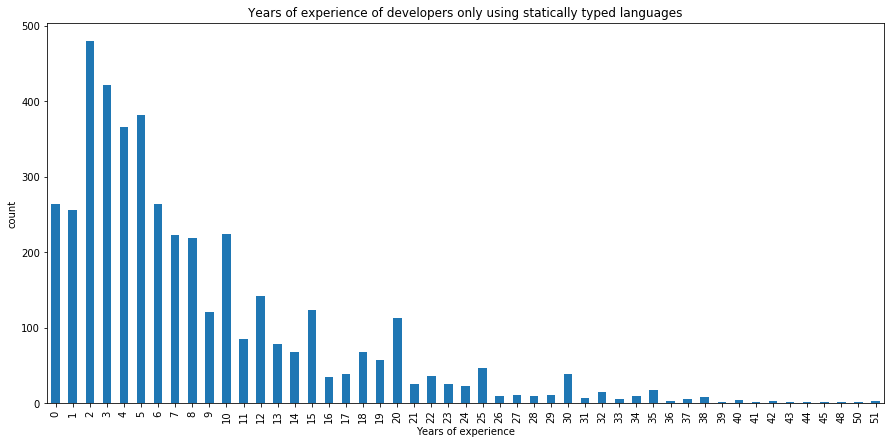

In [129]:

yearsStatic.sort_index().plot(kind="bar")
plt.title('Years of experience of developers only using statically typed languages');
plt.xlabel('Years of experience');
plt.ylabel('count');

In [130]:
yearsDynamic = df_used_dynamic['YearsCodePro'].value_counts().rename(index={'Less than 1 year': '0','More than 50 years':'51'})
yearsDynamic.index = pd.to_numeric(yearsDynamic.index,errors='coerce')
yearsDynamic.sum()



6037

Text(0, 0.5, 'count')

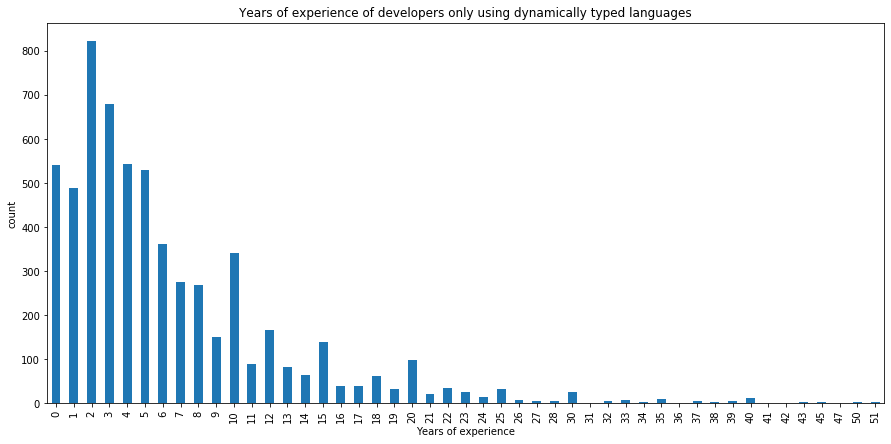

In [131]:
yearsDynamic.sort_index().plot(kind="bar")
plt.title('Years of experience of developers only using dynamically typed languages')
plt.xlabel('Years of experience')
plt.ylabel('count')

In [132]:
salaryStatic = df_used_static['ConvertedComp'].replace(0,np.nan).dropna()
salaryStatic = salaryStatic[salaryStatic<50000]
salaryStatic.mean()

22626.773442416616

Text(0, 0.5, 'count')

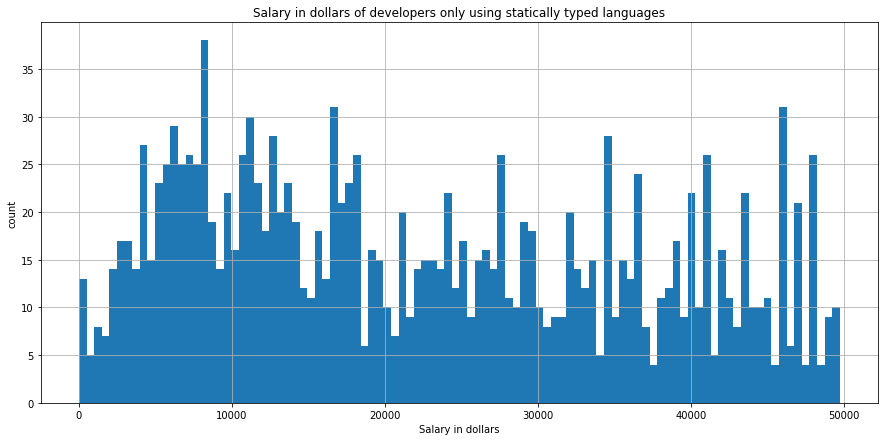

In [133]:
salaryStatic.hist(bins=100)
plt.title('Salary in dollars of developers only using statically typed languages')
plt.xlabel('Salary in dollars')
plt.ylabel('count')

In [134]:
salaryDynamic = df_used_dynamic['ConvertedComp'].replace(0,np.nan).dropna()
salaryDynamic = salaryDynamic[salaryDynamic<50000]
salaryDynamic.mean()

22292.597690941384

Text(0, 0.5, 'count')

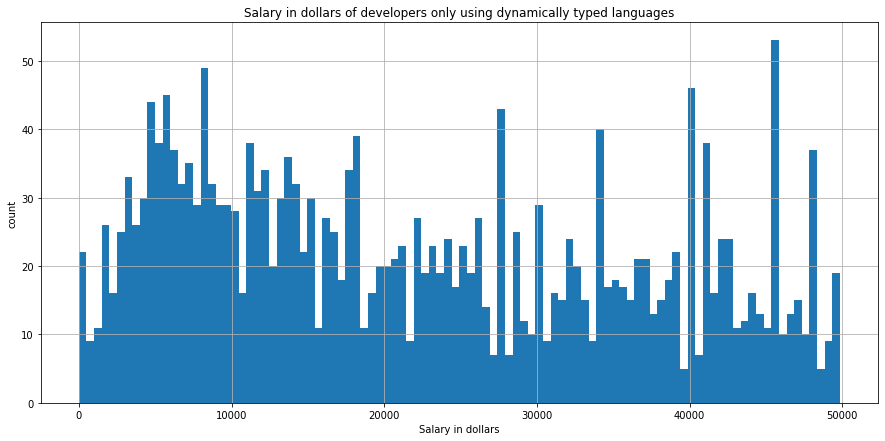

In [135]:
salaryDynamic.hist(bins=100)
plt.title('Salary in dollars of developers only using dynamically typed languages')
plt.xlabel('Salary in dollars')
plt.ylabel('count')